In [1]:
from binance.cm_futures import CMFutures

cm_futures_client = CMFutures()

# get server time
print(cm_futures_client.time())

cm_futures_client = CMFutures(key="3a6Q0unsfYV8RXpehFENffnE4hgbWcNAaRRVjrEM99dUTt05l9vPQR1tCeZ8RTOh", secret="aDW3Bwd0POckjdUrBm68kMYdm5CGpBW4FiWzVopLPkGuSOhqlwLLevy2VjOEkwIL")

# Get account information
#print(cm_futures_client.account())


{'serverTime': 1680745190629}


In [22]:
s ='Alvarez'
s[0:2]

'Al'

In [103]:
from binance.client import Client
import pandas as pd

client = Client(api_key= "3a6Q0unsfYV8RXpehFENffnE4hgbWcNAaRRVjrEM99dUTt05l9vPQR1tCeZ8RTOh", api_secret="aDW3Bwd0POckjdUrBm68kMYdm5CGpBW4FiWzVopLPkGuSOhqlwLLevy2VjOEkwIL")

monedas = ['BTCUSDT', 'XLMUSDT', 'ETHUSDT']
Dataframes_monedas = {}

for moneda in monedas:
    candles = client.get_klines(symbol= moneda, interval=Client.KLINE_INTERVAL_1HOUR, limit = 100)
    len(candles)

    price_df = pd.DataFrame(candles, columns=['dateTime',
                                            'open',
                                            'high', 'low',
                                            'close', 'volume',
                                            'closeTime',
                                            'quoteAssetVolume',
                                            'numberOfTrades',
                                            'takerBuyBaseVol',
                                            'takerBuyQuoteVol', 'ignore'])
    price_df.dateTime = pd.to_datetime(price_df.dateTime, unit='ms')
    price_df.set_index('dateTime')
    price_df.closeTime = pd.to_datetime(price_df.closeTime, unit='ms')
    price_df.close = pd.to_numeric(price_df.close)
    price_df.volume = pd.to_numeric(price_df.volume)
    price_df.high = pd.to_numeric(price_df.high)
    price_df.low = pd.to_numeric(price_df.low)

    ##-------------------------------------------------------- extraemos lista con precios close-------------------------
    lista_precios = [ element for element in price_df['close']]
    Dataframes_monedas[str(moneda)+ '_df'] = lista_precios

In [77]:
def calcular_bollinger_bands(precios, dias=20, k=2):
    # Convertir la lista de precios a una serie de Pandas
    precios = pd.Series(precios)

    # Calcular la media móvil de los precios
    sma = precios.rolling(window=dias).mean()

    # Calcular la desviación estándar de los precios
    std = precios.rolling(window=dias).std()

    # Calcular las bandas de Bollinger superior e inferior
    upper_band = sma + (k * std)
    lower_band = sma - (k * std)

    # Devolver un DataFrame con las bandas de Bollinger y la media móvil
    return pd.DataFrame({'Precio': precios, 'Media Móvil': sma, 'Banda Superior': upper_band, 'Banda Inferior': lower_band})


In [99]:
final1 = calcular_bollinger_bands(precios = Dataframes_monedas['ETHUSDT_df'], dias = 20, k = 4)
final2 = calcular_bollinger_bands(precios = Dataframes_monedas['BTCUSDT_df'], dias = 20, k = 4)
final3 = calcular_bollinger_bands(precios = Dataframes_monedas['XLMUSDT_df'], dias = 20, k = 4)


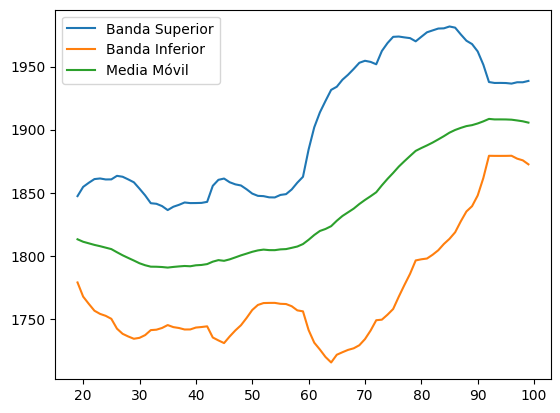

In [100]:
#Grafica de bandas de Bollinger
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
final1.plot( y=['Banda Superior', 'Banda Inferior', 'Media Móvil'], ax=ax)
plt.show()


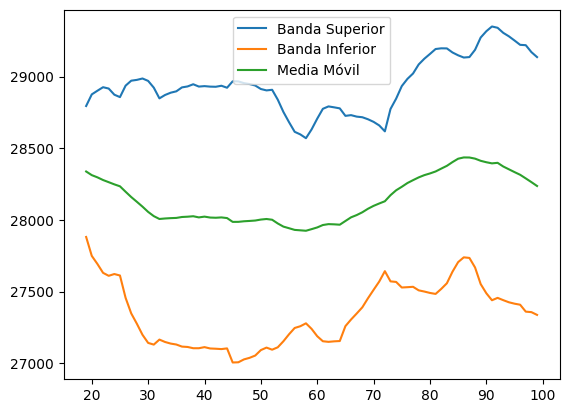

In [101]:
fig, ax = plt.subplots()
final2.plot( y=['Banda Superior', 'Banda Inferior', 'Media Móvil'], ax=ax)
plt.show()

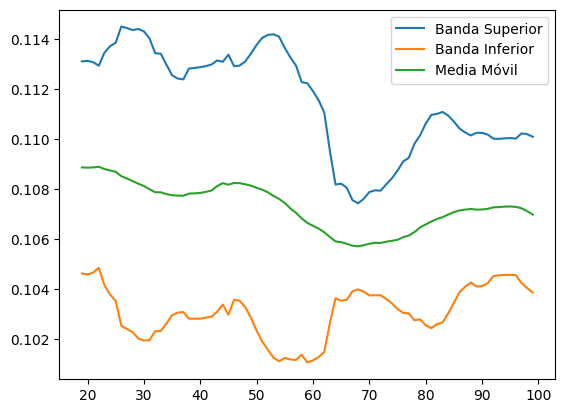

In [102]:
fig, ax = plt.subplots()
final3.plot( y=['Banda Superior', 'Banda Inferior', 'Media Móvil'], ax=ax)
plt.show()
"oe"